In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("usa_rain_prediction_dataset_2024_2025.csv")
data

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [4]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Check for missing values
print(data.isnull().sum())

# Drop any rows with missing values (if any)
data.dropna(inplace=True)

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Feature engineering: extract additional date features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday

# Drop the original 'Date' column
data.drop('Date', axis=1, inplace=True)

# Define features and target variable
X = data.drop('Rain Tomorrow', axis=1)  # Features
y = data['Rain Tomorrow']  # Target variable


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64


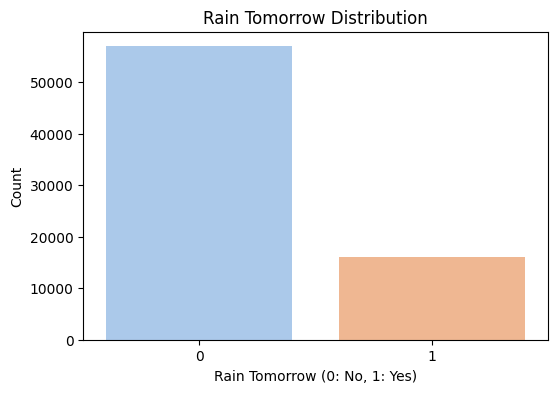

In [6]:
# Rain Tomorrow distribution
# Create a figure with a specified size (6x4) for better clarity
plt.figure(figsize=(6, 4))

# Create a count plot to visualize the distribution of 'Rain Tomorrow' values
# 'x='Rain Tomorrow'' specifies the column we are plotting
# 'data=data' tells the function to use the 'data' DataFrame
# 'palette='pastel'' applies a light color palette for better aesthetics
sns.countplot(x='Rain Tomorrow', data=data, palette='pastel')

# Add a title to the plot
plt.title('Rain Tomorrow Distribution')

# Set the x-axis label to indicate what 'Rain Tomorrow' values represent (0: No, 1: Yes)
plt.xlabel('Rain Tomorrow (0: No, 1: Yes)')

# Set the y-axis label to indicate the count of occurrences for each class (Yes or No)
plt.ylabel('Count')

# Display the plot
plt.show()


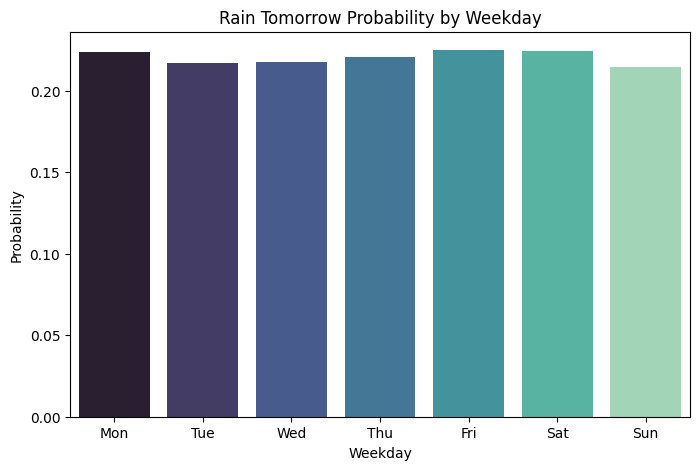

In [7]:
# Weekly trends (rain occurrence by weekday)
# Group the data by 'Weekday' and calculate the mean of 'Rain Tomorrow' for each weekday
# This gives the probability of rain tomorrow for each day of the week
weekly_trends = data.groupby('Weekday')['Rain Tomorrow'].mean()

# Create a figure for the plot with a specific size (8x5)
plt.figure(figsize=(8, 5))

# Create a bar plot to display the weekly trend of 'Rain Tomorrow' probability
# 'weekly_trends.index' is used as the x-axis (the weekdays), and 'weekly_trends.values' is used as the y-axis (rain probability)
# 'palette' specifies the color palette for the bars (here using 'mako' for a cool color scheme)
sns.barplot(x=weekly_trends.index, y=weekly_trends.values, palette='mako')

# Add a title to the plot
plt.title('Rain Tomorrow Probability by Weekday')

# Set the x-axis label (weekday names)
plt.xlabel('Weekday')

# Set the y-axis label (probability of rain tomorrow)
plt.ylabel('Probability')

# Set custom tick labels on the x-axis for the weekdays
# Weekdays are labeled as 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', and 'Sun'
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Display the plot
plt.show()


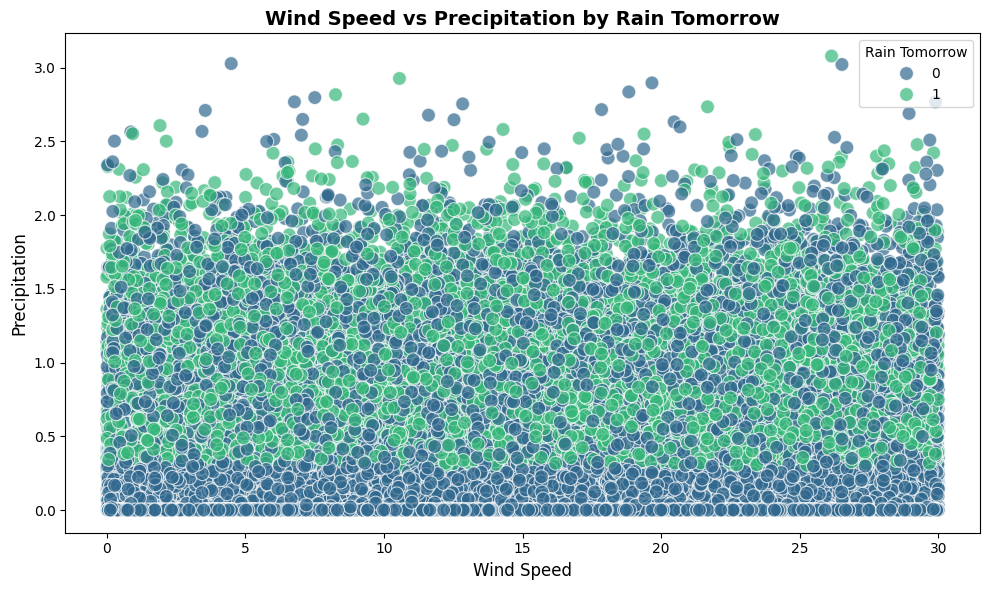

In [8]:
# 5. Wind Speed vs Precipitation by Rain Tomorrow
# Create a figure for the plot with a specific size (10x6)
plt.figure(figsize=(10, 6))

# Create a scatter plot with 'Wind Speed' on the x-axis and 'Precipitation' on the y-axis
# 'hue' is used to color the points based on the 'Rain Tomorrow' column (categorizing by rain prediction)
# 'palette' specifies the color palette for the hue (here using 'viridis' for a color gradient)
# 's' specifies the size of the scatter plot markers, and 'alpha' sets the transparency of the points
sns.scatterplot(x='Wind Speed', y='Precipitation', hue='Rain Tomorrow', data=data, palette='viridis', s=100, alpha=0.7)

# Add a title to the plot with custom font size and weight
plt.title('Wind Speed vs Precipitation by Rain Tomorrow', fontsize=14, fontweight='bold')

# Set the x-axis label with custom font size
plt.xlabel('Wind Speed', fontsize=12)

# Set the y-axis label with custom font size
plt.ylabel('Precipitation', fontsize=12)

# Add a legend to the plot indicating the 'Rain Tomorrow' categories (with title 'Rain Tomorrow')
plt.legend(title='Rain Tomorrow', loc='upper right')

# Adjust layout to ensure everything fits well in the figure
plt.tight_layout()

# Display the plot
plt.show()


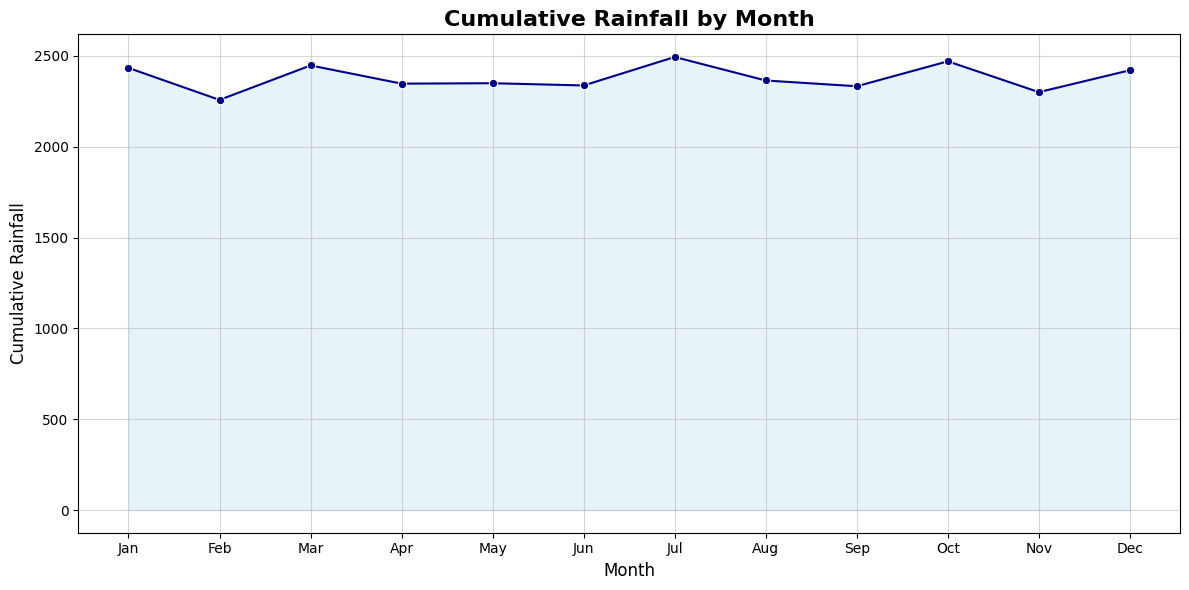

In [9]:
# 6. Cumulative Rainfall by Month
# Group the data by 'Month' and sum the 'Precipitation' values to calculate cumulative rainfall per month
monthly_rainfall = data.groupby('Month')['Precipitation'].sum()

# Create a figure for the plot with a specific size (12x6)
plt.figure(figsize=(12, 6))

# Plot a line plot showing cumulative rainfall across months
# 'x' is the index (months), 'y' is the cumulative rainfall values
# 'marker' adds a marker to each data point, 'color' specifies the line color
sns.lineplot(x=monthly_rainfall.index, y=monthly_rainfall.values, marker='o', color='darkblue')

# Fill the area under the line with a light blue color to visually emphasize the cumulative rainfall
# 'alpha' controls the transparency of the fill
plt.fill_between(monthly_rainfall.index, monthly_rainfall.values, color='lightblue', alpha=0.3)

# Add a title to the plot with custom font size and weight
plt.title('Cumulative Rainfall by Month', fontsize=16, fontweight='bold')

# Set the x-axis label with custom font size
plt.xlabel('Month', fontsize=12)

# Set the y-axis label with custom font size
plt.ylabel('Cumulative Rainfall', fontsize=12)

# Set custom x-ticks labels to represent month names instead of numeric values
# 'ticks' are the positions on the x-axis, 'labels' are the corresponding month names
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add a grid to the plot to make it easier to read values, with transparency set to 50%
plt.grid(alpha=0.5)

# Adjust layout to ensure everything fits well in the figure
plt.tight_layout()

# Display the plot
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate a synthetic dataset (you can replace it with your own dataset)
# `make_classification` creates a simple classification dataset with 1000 samples, 20 features, and 2 classes.
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets (80% training, 20% testing)
# `train_test_split` divides the data into X_train, X_test (features), and y_train, y_test (labels).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of depths and widths to experiment with
depths = [1, 2, 3, 4, 5]  # Number of hidden layers in the MLP
widths = [5, 10, 20, 50, 100]  # Number of neurons per hidden layer

# Create a dictionary to store performance results
results = {'depth': [], 'width': [], 'accuracy': []}

# Iterate over different combinations of network depths and widths
for depth in depths:
    for width in widths:
        # Create an MLP model with the current depth and width configuration
        # The `hidden_layer_sizes` argument specifies the number of neurons per layer. 
        # We use a tuple of length `depth`, where each element represents the number of neurons in a hidden layer.
        model = MLPClassifier(hidden_layer_sizes=(width,) * depth, max_iter=500, random_state=42)
        
        # Train the model on the training data
        model.fit(X_train, y_train)
        
        # Use the trained model to make predictions on the test data
        y_pred = model.predict(X_test)
        
        # Calculate the accuracy of the model on the test data
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the current configuration and its accuracy
        results['depth'].append(depth)  # Store the number of layers (depth)
        results['width'].append(width)  # Store the number of neurons per layer (width)
        results['accuracy'].append(accuracy)  # Store the calculated accuracy

# Convert the results dictionary into a numpy array for easier manipulation
# The `results_array` has columns: depth, width, and accuracy.
results_array = np.array([results['depth'], results['width'], results['accuracy']]).T

# Reshape the results into a 2D matrix for easier visualization of accuracy by depth and width
# Each row corresponds to a specific depth, and each column corresponds to a specific width.
accuracy_matrix = results_array[:, 2].reshape(len(depths), len(widths))



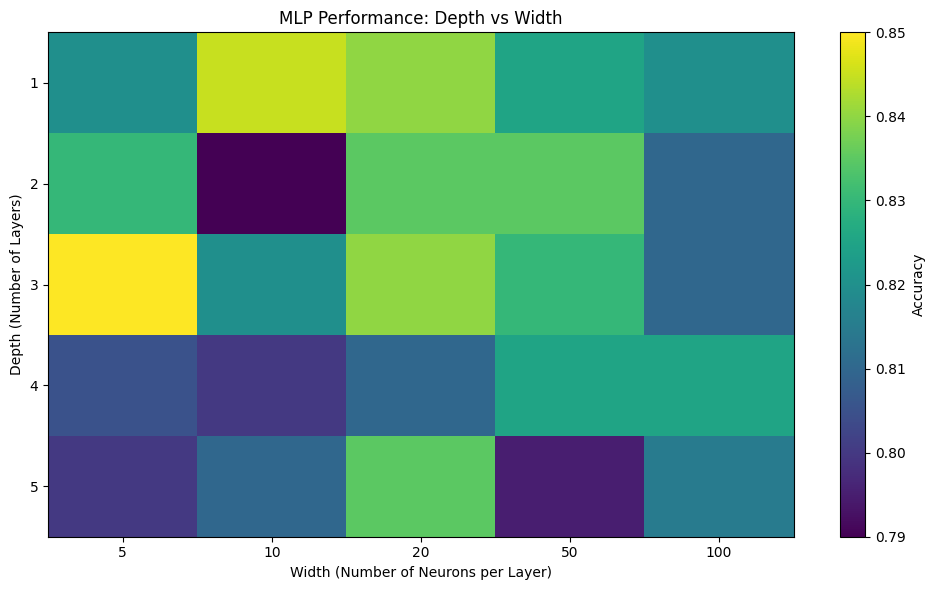

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the heatmap of accuracy with respect to depth and width
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(accuracy_matrix, cmap='viridis', interpolation='nearest', aspect='auto')  # Plot the heatmap
plt.colorbar(label='Accuracy')  # Add a color bar to show the scale of accuracy
plt.title('MLP Performance: Depth vs Width')  # Set the title of the plot
plt.xlabel('Width (Number of Neurons per Layer)')  # Label for the x-axis
plt.ylabel('Depth (Number of Layers)')  # Label for the y-axis
plt.xticks(np.arange(len(widths)), widths)  # Set x-ticks to represent widths
plt.yticks(np.arange(len(depths)), depths)  # Set y-ticks to represent depths
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Display the plot


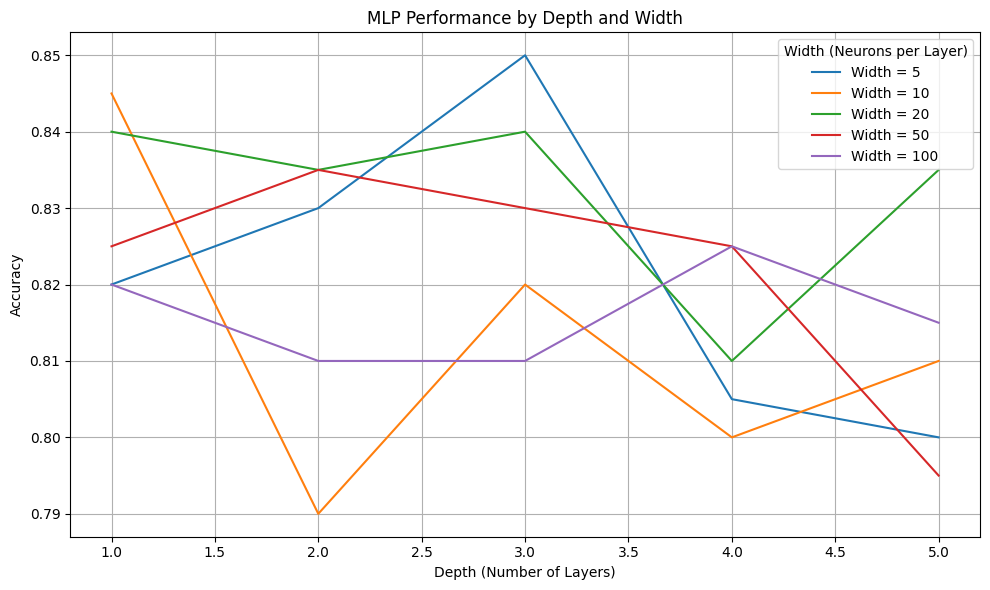

In [12]:
# Plot accuracy as a function of depth for each width
plt.figure(figsize=(10, 6))  # Set the size of the figure
for i, width in enumerate(widths):  # Loop through each width
    accuracies = accuracy_matrix[:, i]  # Get the accuracies for the current width
    plt.plot(depths, accuracies, label=f'Width = {width}')  # Plot accuracy vs depth for each width
plt.title('MLP Performance by Depth and Width')  # Set the title of the plot
plt.xlabel('Depth (Number of Layers)')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend(title='Width (Neurons per Layer)')  # Add a legend with width as the title
plt.grid(True)  # Add gridlines for better visibility
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Display the plot


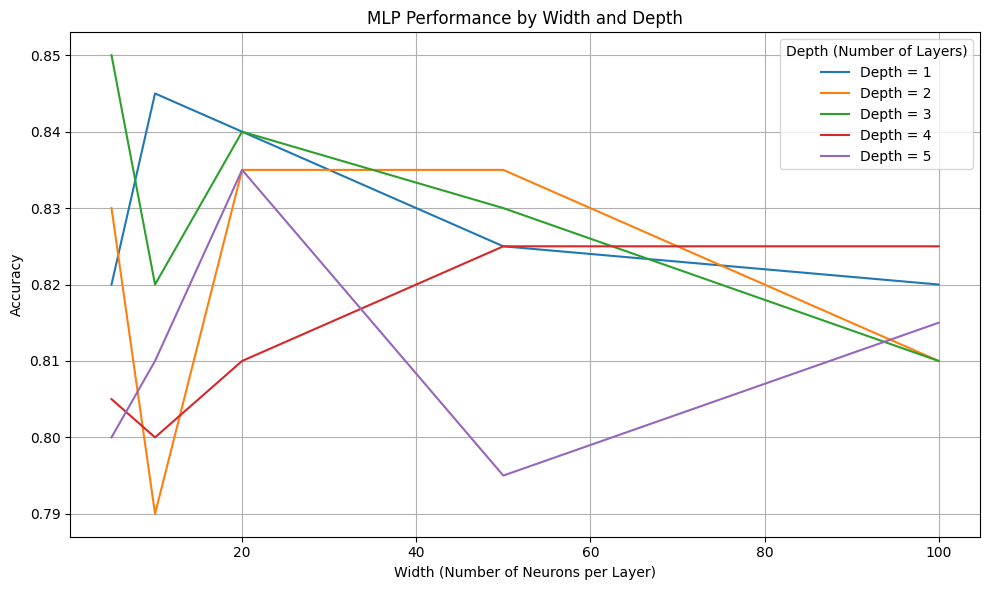

In [13]:
import matplotlib.pyplot as plt

# Plot accuracy as a function of width for each depth
plt.figure(figsize=(10, 6))  # Set the size of the figure
for i, depth in enumerate(depths):  # Loop through each depth
    accuracies = accuracy_matrix[i, :]  # Get the accuracies for the current depth
    plt.plot(widths, accuracies, label=f'Depth = {depth}')  # Plot accuracy vs width for each depth
plt.title('MLP Performance by Width and Depth')  # Set the title of the plot
plt.xlabel('Width (Number of Neurons per Layer)')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend(title='Depth (Number of Layers)')  # Add a legend with depth as the title
plt.grid(True)  # Add gridlines for better visibility
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Display the plot


Best performing model configuration:
Depth: 3.0
Width: 5.0
Accuracy: 0.8500

Full results sorted by accuracy:
    Depth  Width  Accuracy
10      3      5     0.850
1       1     10     0.845
12      3     20     0.840
2       1     20     0.840
22      5     20     0.835
7       2     20     0.835
8       2     50     0.835
5       2      5     0.830
13      3     50     0.830
3       1     50     0.825
19      4    100     0.825
18      4     50     0.825
0       1      5     0.820
11      3     10     0.820
4       1    100     0.820
24      5    100     0.815
14      3    100     0.810
17      4     20     0.810
9       2    100     0.810
21      5     10     0.810
15      4      5     0.805
16      4     10     0.800
20      5      5     0.800
23      5     50     0.795
6       2     10     0.790


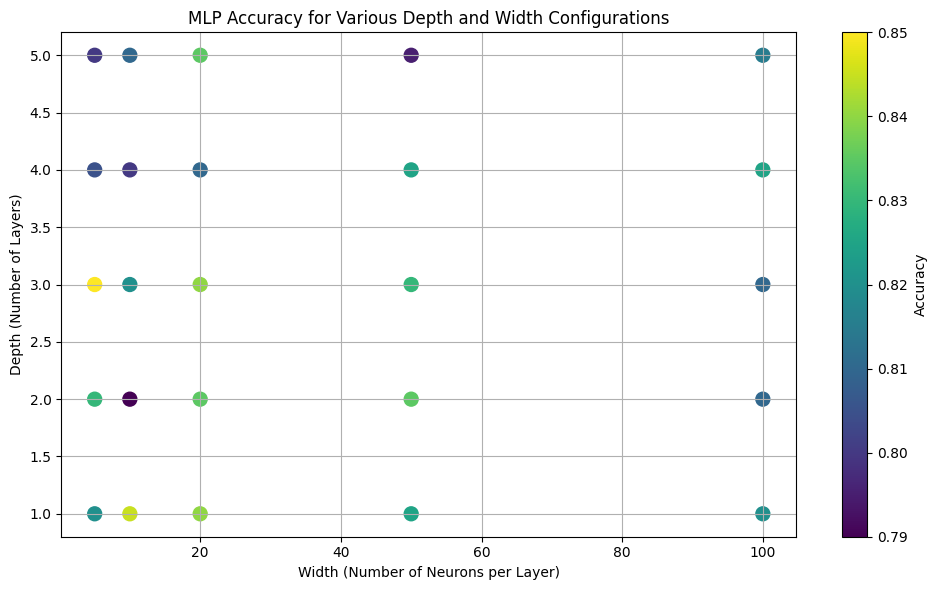


Best Model Accuracy: 0.8500


In [14]:
# Convert the experiment results into a pandas DataFrame for better readability and analysis
results_df = pd.DataFrame({
    'Depth': results['depth'],       # The depth of the MLP (number of layers)
    'Width': results['width'],       # The width of the MLP (number of neurons per layer)
    'Accuracy': results['accuracy']  # The accuracy for each configuration
})

# Display the top-performing model with the highest accuracy
best_model = results_df.loc[results_df['Accuracy'].idxmax()]  # Find the row with the maximum accuracy
print("Best performing model configuration:")
print(f"Depth: {best_model['Depth']}")  # Print the depth of the best model
print(f"Width: {best_model['Width']}")  # Print the width of the best model
print(f"Accuracy: {best_model['Accuracy']:.4f}")  # Print the accuracy of the best model (formatted to 4 decimal places)

# Display the full results sorted by accuracy in descending order
print("\nFull results sorted by accuracy:")
sorted_results = results_df.sort_values(by='Accuracy', ascending=False)  # Sort the DataFrame by accuracy
print(sorted_results)  # Display the sorted results

# Visualize the accuracy of all configurations (depth, width) with a scatter plot for better inspection
plt.figure(figsize=(10, 6))  # Create a figure with specific dimensions
plt.scatter(results_df['Width'], results_df['Depth'], c=results_df['Accuracy'], cmap='viridis', s=100)
# Scatter plot of Width vs Depth with color representing Accuracy. 'viridis' is the color map used.
plt.colorbar(label='Accuracy')  # Add a color bar to represent accuracy values
plt.title('MLP Accuracy for Various Depth and Width Configurations')  # Set the title for the plot
plt.xlabel('Width (Number of Neurons per Layer)')  # Label the x-axis (Width)
plt.ylabel('Depth (Number of Layers)')  # Label the y-axis (Depth)
plt.grid(True)  # Enable grid for better visualization
plt.tight_layout()  # Adjust the layout to ensure everything fits
plt.show()  # Display the plot

# Display the accuracy of the best configuration separately for emphasis
print(f"\nBest Model Accuracy: {best_model['Accuracy']:.4f}")  # Print the best model's accuracy
